In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
data =od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: basanttyasser
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [01:01<00:00, 40.0MB/s]


In [3]:
#handling manipulation of data to get size of images and count them
import pandas as pd
import numpy as np
#handling showing images 
import matplotlib.pyplot as plt
%matplotlib inline
#handling style of showing images and graphics in matplotlib
#import seaborn as sns
#sns.set(style="whitegrid")
#handling folders and help in read and remove folders
import os
#handling pathes of folders and return content of specific pathes
import glob as gb
import cv2
import tensorflow as tf
from tensorflow import keras

In [5]:
trainpath ='/content/chest-xray-pneumonia/chest_xray/train/'
testpath = '/content/chest-xray-pneumonia/chest_xray/test/'
valpath = '/content/chest-xray-pneumonia/chest_xray/val/'

In [6]:
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpeg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 1341 in folder NORMAL
For training data , found 3875 in folder PNEUMONIA


In [7]:
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpeg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 234 in folder NORMAL
For training data , found 390 in folder PNEUMONIA


In [8]:
for folder in  os.listdir(valpath ) : 
    files = gb.glob(pathname= str( valpath + folder + '/*.jpeg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 8 in folder NORMAL
For training data , found 8 in folder PNEUMONIA


In [9]:
#dictionary of all exist classes and its numberic values in used in dataset 
code = {'NORMAL':0 ,'PNEUMONIA':1}

#used for getting name of class x  using its number n or y
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [10]:
size = []

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpeg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
        
#count each similar size contained in size list to know most common size in images        
pd.Series(size).value_counts()

(648, 1072)      7
(728, 1080)      6
(592, 992)       5
(680, 1008)      5
(872, 1216)      5
                ..
(1176, 1416)     1
(586, 923, 3)    1
(1840, 1984)     1
(1264, 1534)     1
(736, 1440)      1
Length: 4366, dtype: int64

In [11]:
size = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpeg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(736, 1112)     3
(904, 1368)     2
(648, 1032)     2
(600, 1112)     2
(712, 1096)     2
               ..
(2329, 2480)    1
(1893, 2624)    1
(1576, 2143)    1
(1435, 1816)    1
(824, 1080)     1
Length: 598, dtype: int64

In [12]:
size = []
for folder in  os.listdir(valpath) : 
    files = gb.glob(pathname= str( valpath + folder + '/*.jpeg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(1416, 1736)    1
(1104, 1328)    1
(1104, 1240)    1
(1302, 1564)    1
(1416, 1776)    1
(928, 1288)     1
(1225, 1632)    1
(1040, 1272)    1
(664, 1152)     1
(656, 1016)     1
(944, 1416)     1
(864, 1256)     1
(952, 1192)     1
(592, 968)      1
(712, 1072)     1
(1128, 1664)    1
dtype: int64

In [13]:
s = 224

In [14]:
#empty list to contain images itself called featues for the CNN model  
X_train = []
#empty list to contain actual value for each image
y_train = []

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        #using cv2.resize without determine interpolation make it preserve aspect ratio for each image 
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [15]:
print(f'we have {len(X_train)} items in X_train')

we have 5216 items in X_train


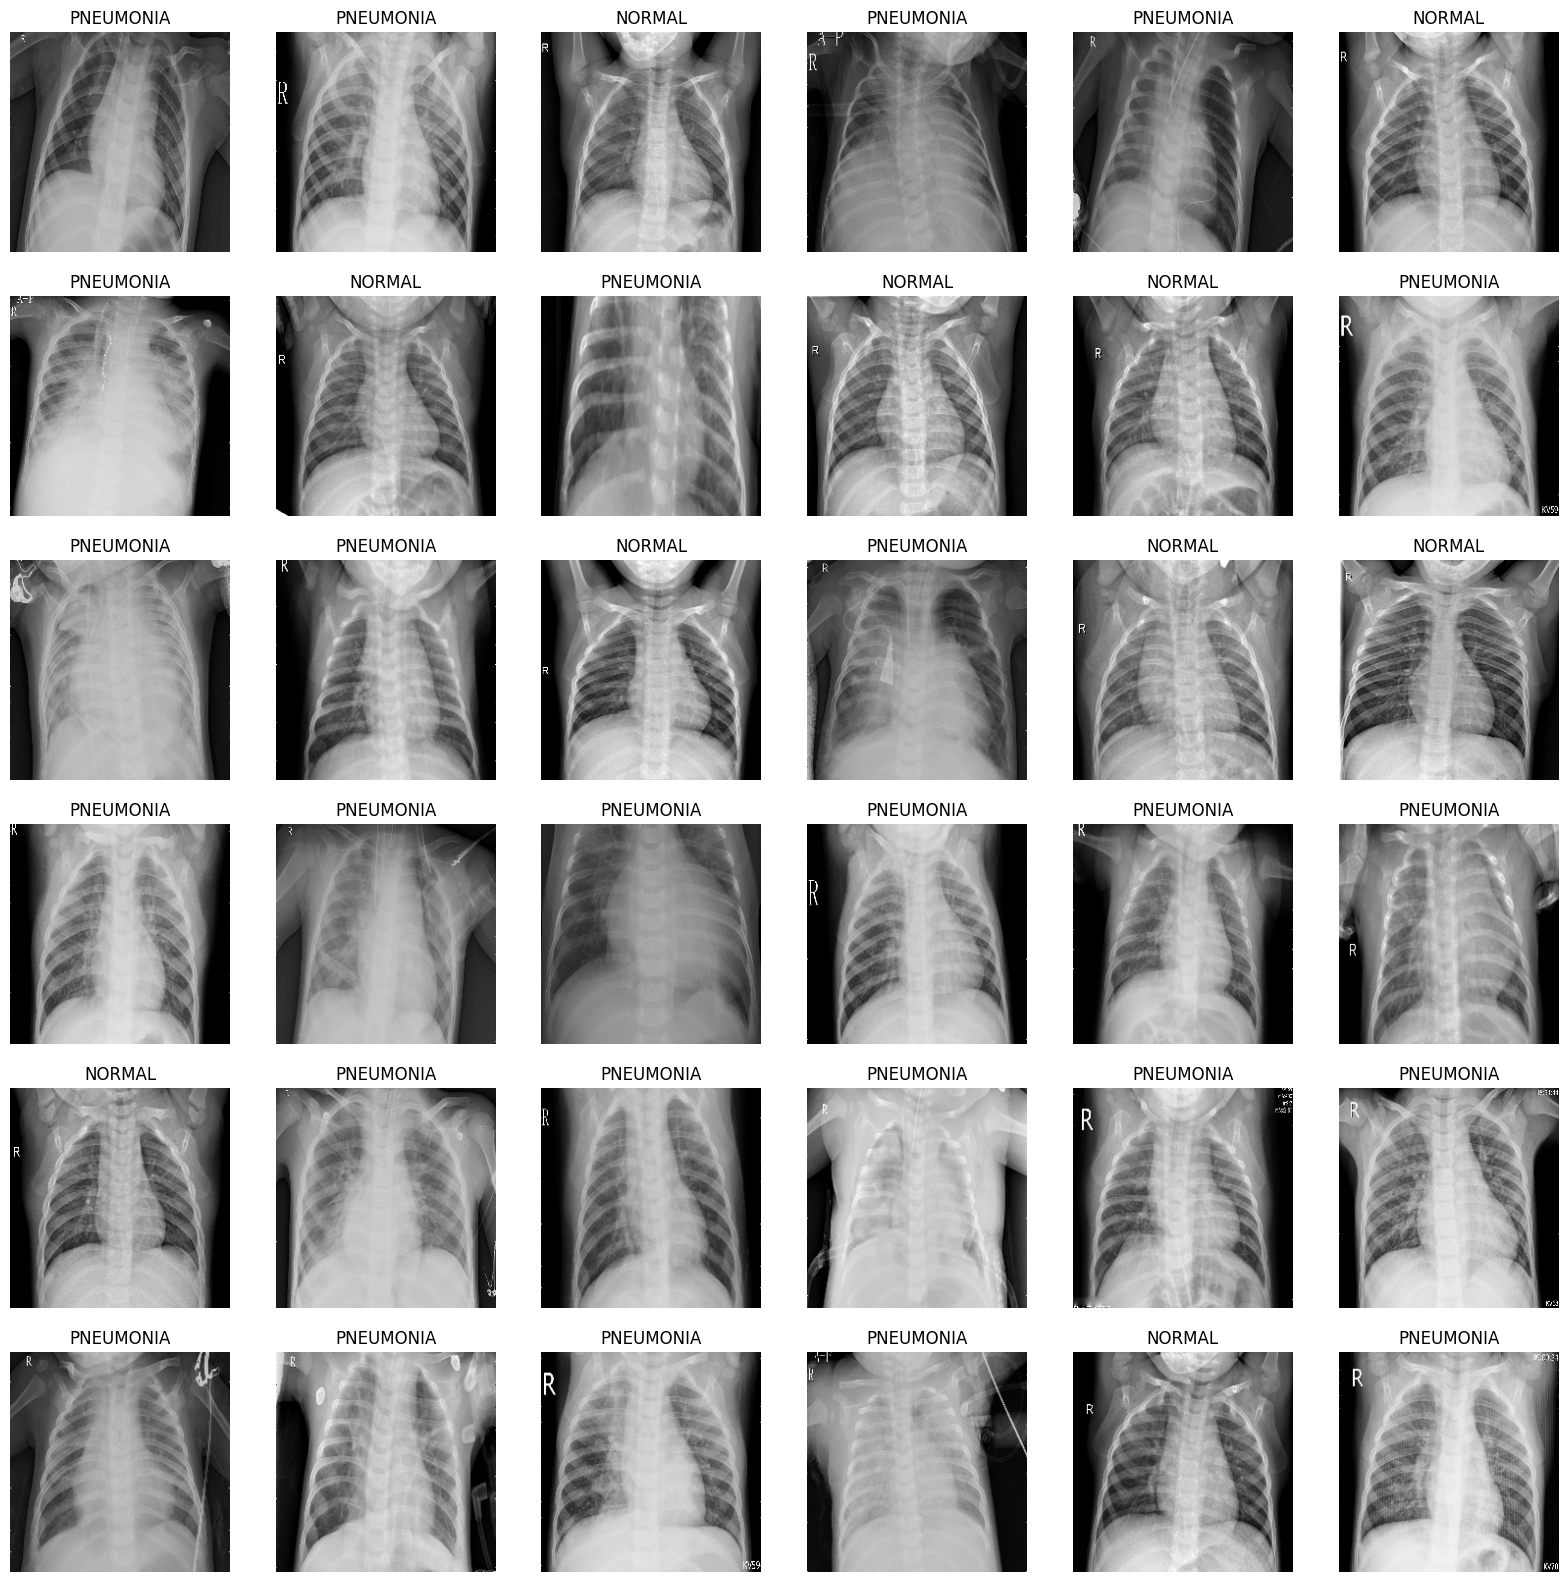

In [16]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [17]:
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str(testpath + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [18]:
print(f'we have {len(X_test)} items in X_test')

we have 624 items in X_test


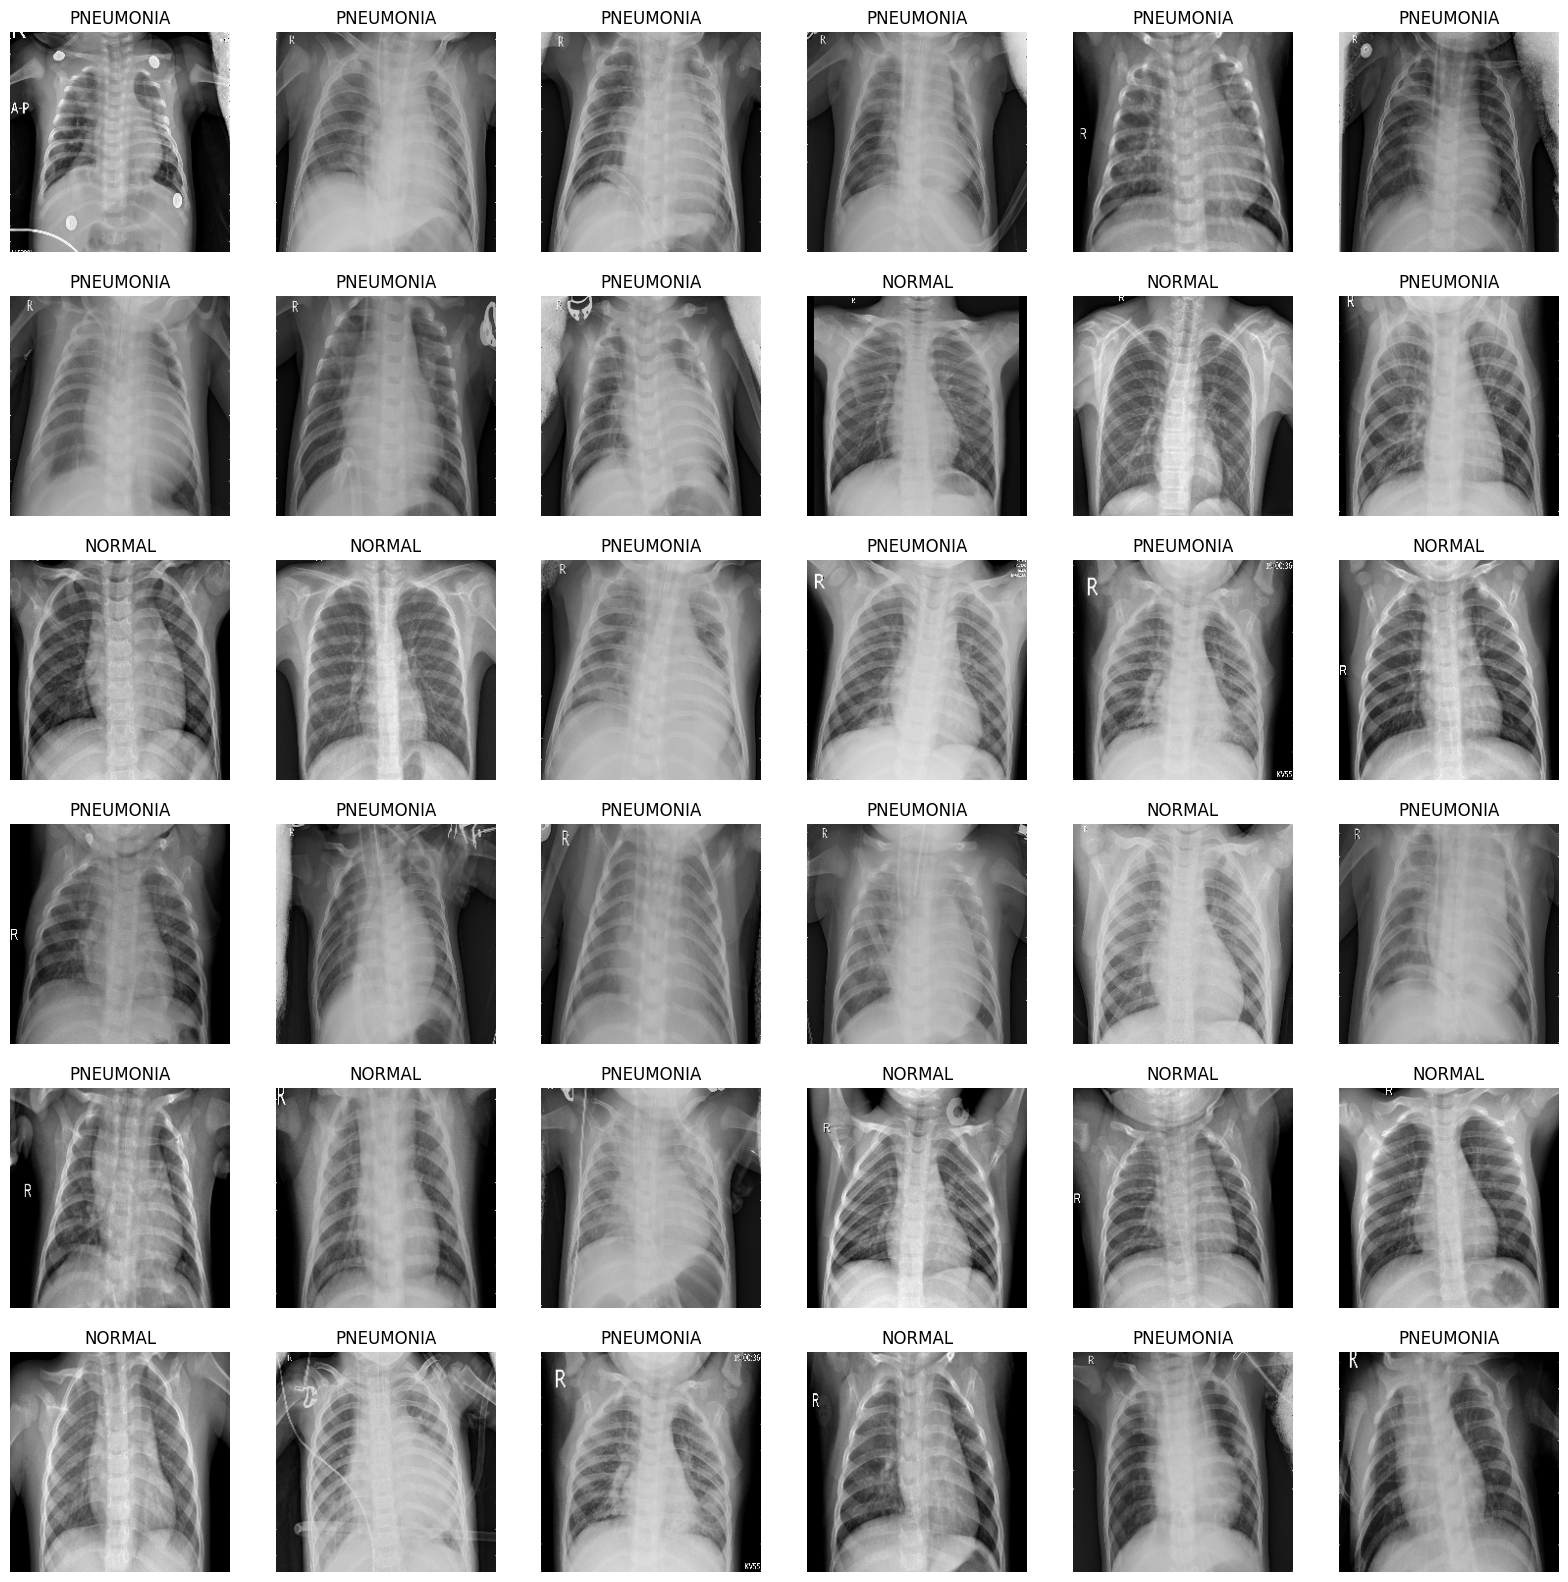

In [19]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [20]:
X_val = []
y_val = []
for folder in  os.listdir(valpath ) : 
    files = gb.glob(pathname= str(valpath + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_val.append(list(image_array))
        y_val.append(code[folder])

In [21]:
print(f'we have {len(X_val)} items in X_test')

we have 16 items in X_test


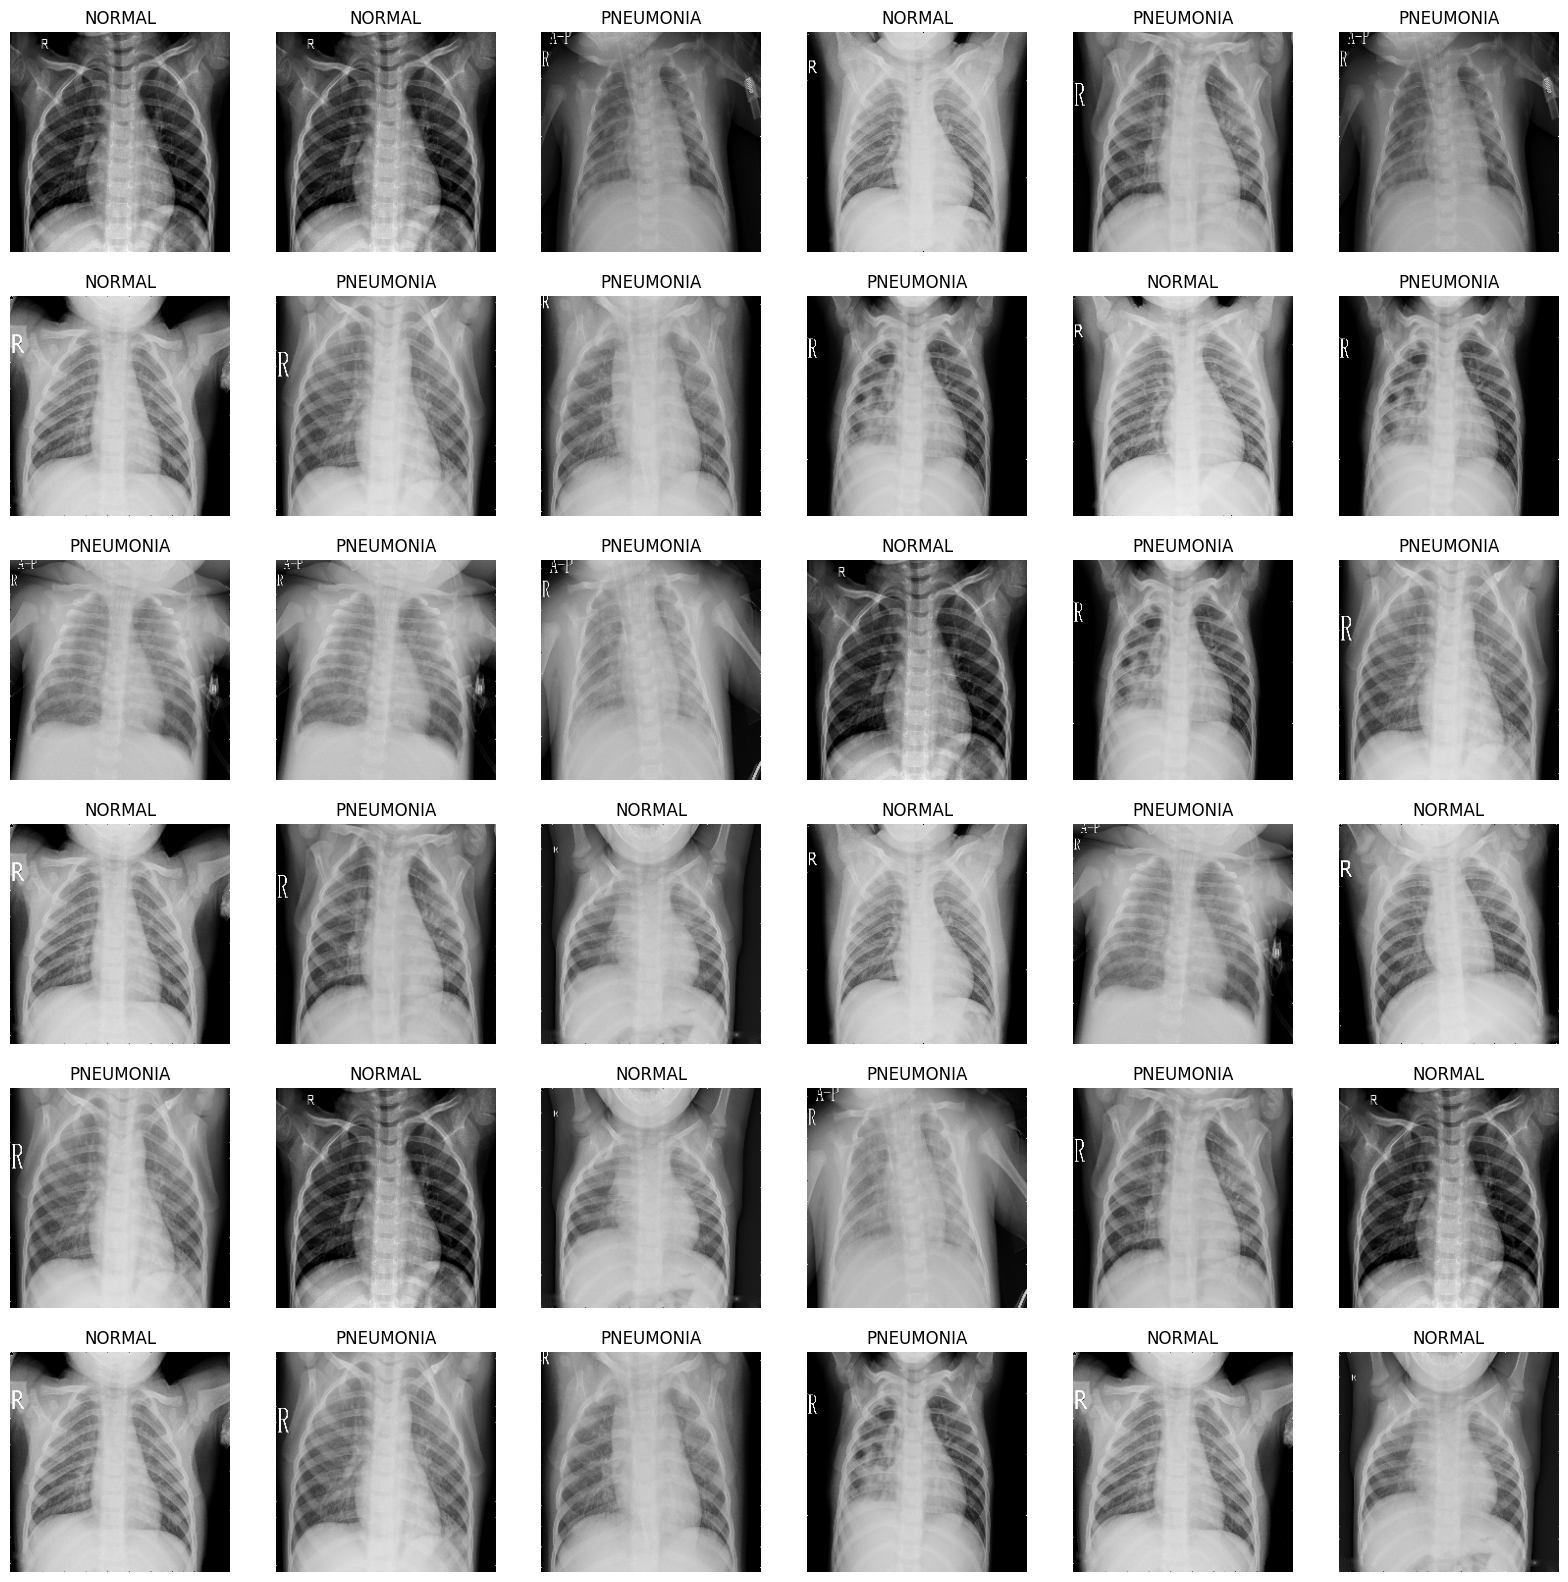

In [22]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_val),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_val[i])    
    plt.axis('off')
    plt.title(getcode(y_val[i]))

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

X_val = np.array(X_val)
y_val = np.array(y_val)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_val shape  is {X_val.shape}')


print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'y_val shape  is {y_val.shape}')

X_train shape  is (5216, 224, 224, 3)
X_test shape  is (624, 224, 224, 3)
X_val shape  is (16, 224, 224, 3)
y_train shape  is (5216,)
y_test shape  is (624,)
y_val shape  is (16,)


In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(s,s,3)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax),
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
163/163 [==============================] - 10s 20ms/step - loss: 512.1551 - accuracy: 0.7419
Epoch 2/10
163/163 [==============================] - 3s 19ms/step - loss: 21.5347 - accuracy: 0.8884
Epoch 3/10
163/163 [==============================] - 3s 19ms/step - loss: 15.4708 - accuracy: 0.9078
Epoch 4/10
163/163 [==============================] - 3s 19ms/step - loss: 26.8892 - accuracy: 0.8735
Epoch 5/10
163/163 [==============================] - 3s 20ms/step - loss: 18.0117 - accuracy: 0.9020
Epoch 6/10
163/163 [==============================] - 3s 19ms/step - loss: 16.4921 - accuracy: 0.8800
Epoch 7/10
163/163 [==============================] - 3s 19ms/step - loss: 7.0105 - accuracy: 0.9193
Epoch 8/10
163/163 [==============================] - 3s 19ms/step - loss: 2.0390 - accuracy: 0.9413
Epoch 9/10
163/163 [==============================] - 3s 20ms/step - loss: 1.5646 - accuracy: 0.9358
Epoch 10/10
163/163 [==============================] - 3s 19ms/step - loss: 0.8445 

In [25]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
test_accuracy

20/20 [==============================] - 0s 8ms/step - loss: 5.8331 - accuracy: 0.7228


0.7227563858032227

In [26]:
out=model.predict(X_test)
y_predict= np.argmax(out,axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test))

20/20 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.27      0.96      0.43        67
           1       0.99      0.69      0.82       557

    accuracy                           0.72       624
   macro avg       0.63      0.83      0.62       624
weighted avg       0.92      0.72      0.78       624



In [27]:
filtersize =20
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 150)     270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 150)    0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 120)     162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 80)      86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 104, 104, 50)      36050     
                                 

In [30]:
epochs = 3
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=32,verbose=1)

Epoch 1/3
163/163 [==============================] - 132s 717ms/step - loss: 2.5583 - accuracy: 0.7788
Epoch 2/3
163/163 [==============================] - 119s 731ms/step - loss: 0.5507 - accuracy: 0.8355
Epoch 3/3
163/163 [==============================] - 119s 730ms/step - loss: 0.3761 - accuracy: 0.8560


In [31]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

20/20 [==============================] - 7s 324ms/step - loss: 1.1175 - accuracy: 0.7051
Test Loss is 1.1174877882003784
Test Accuracy is 0.7051281929016113


In [48]:
import tensorflow_hub as hub
feature_extractor_model = "https://tfhub.dev/google/remote_sensing/bigearthnet-resnet50/1"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224), trainable=False)

In [49]:
num_of_class = 2

model = tf.keras.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_class)
])


In [50]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
163/163 [==============================] - 19s 94ms/step - loss: 2.0062 - acc: 0.7751
Epoch 2/5
163/163 [==============================] - 15s 94ms/step - loss: 0.7570 - acc: 0.8685
Epoch 3/5
163/163 [==============================] - 15s 95ms/step - loss: 0.5465 - acc: 0.8923
Epoch 4/5
163/163 [==============================] - 16s 95ms/step - loss: 0.3229 - acc: 0.9153
Epoch 5/5
163/163 [==============================] - 16s 96ms/step - loss: 0.3603 - acc: 0.9143


In [51]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 3s 139ms/step - loss: 0.7552 - acc: 0.8478


[0.7552484273910522, 0.8477563858032227]